In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import math

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))
usedu = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [2]:
usedu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
A = (57948.0 * 208.327876 + 58025.0 * 252.187522) / (57948.0 + 58025.0)
print(A)

230.27225925429195


In [4]:
usedu.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [5]:
usedu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [6]:
usedu['AVG_MATH_4_SCORE'].mean()

234.76829289706959

### 1. Create a new score variable from the weighted averages of all score variables in the datasets. Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!.

Okay, fistly, let's check it out the difference of student number between 4th grade and 8th grade.  
Now, let's mutiply each one by each. multiply number of student with average score and then plus each result and divide the total students numbers.  
This method would be the perfect score that reflect their weight.

In [7]:
usedu['weighted avg'] = (usedu['GRADES_4_G'] * (usedu['AVG_MATH_4_SCORE'] + usedu['AVG_READING_4_SCORE']) 
                         + usedu['GRADES_8_G'] * (usedu['AVG_MATH_8_SCORE'] + usedu['AVG_READING_8_SCORE'])) / (2 * (usedu['GRADES_8_G'] + usedu['GRADES_4_G']))

In [8]:
usedu['weighted avg'].count()

423

### 2. What are the correlations between this newly created score variable and the expenditure types? Which of the expenditure types is more correlated than the others?

In [9]:
usedu_exp = usedu[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 
                   'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
                  'weighted avg']]

In [10]:
usedu_exp.head()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,weighted avg
0,2653798.0,1481703.0,735036.0,NaN,174053.0,NaN
1,972488.0,498362.0,350902.0,NaN,37451.0,NaN
2,3401580.0,1435908.0,1007732.0,NaN,609114.0,235.639070
3,1743022.0,964323.0,483488.0,NaN,145212.0,235.441283
4,27138832.0,14358922.0,8520926.0,NaN,2044688.0,NaN


In [11]:
from scipy.stats import stats

corr_exp_wa = usedu_exp.corr()
corr_exp_wa

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,weighted avg
TOTAL_EXPENDITURE,1.000000,0.991347,0.993314,0.946110,0.932447,0.089937
INSTRUCTION_EXPENDITURE,0.991347,1.000000,0.976889,0.909340,0.896103,0.103678
SUPPORT_SERVICES_EXPENDITURE,0.993314,0.976889,1.000000,0.953091,0.917782,0.094103
OTHER_EXPENDITURE,0.946110,0.909340,0.953091,1.000000,0.921932,0.004678
CAPITAL_OUTLAY_EXPENDITURE,0.932447,0.896103,0.917782,0.921932,1.000000,0.009855
weighted avg,0.089937,0.103678,0.094103,0.004678,0.009855,1.000000


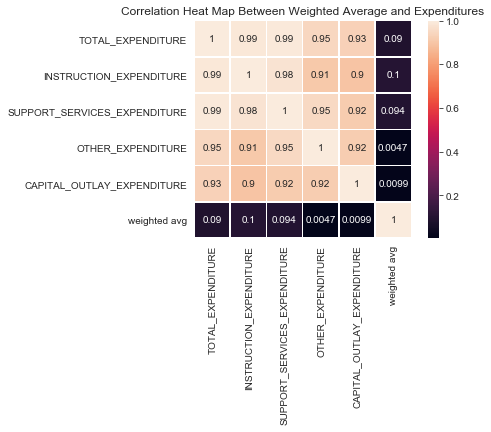

In [12]:
sns.heatmap(corr_exp_wa, square=True, annot=True, linewidths=0.5)
plt.title('Correlation Heat Map Between Weighted Average and Expenditures')
plt.show()

The correlation data and heatmap show that **'INSTRUCTION_EXPENDITURE'** is the most correlated with weighted average.

### 3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [13]:
# Firstly, drop the NaN values.

usedu_exp_nonull = usedu_exp.dropna()

In [14]:
usedu_exp_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 209 to 1249
Data columns (total 6 columns):
TOTAL_EXPENDITURE               416 non-null float64
INSTRUCTION_EXPENDITURE         416 non-null float64
SUPPORT_SERVICES_EXPENDITURE    416 non-null float64
OTHER_EXPENDITURE               416 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      416 non-null float64
weighted avg                    416 non-null float64
dtypes: float64(6)
memory usage: 22.8 KB


In [15]:
X = StandardScaler().fit_transform(usedu_exp_nonull)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00240964  0.99273564  0.9959309   0.94721102  0.93138568  0.07512241]
 [ 0.99273564  1.00240964  0.97824115  0.90689582  0.89071518  0.08915125]
 [ 0.9959309   0.97824115  1.00240964  0.95420054  0.91745451  0.07916845]
 [ 0.94721102  0.90689582  0.95420054  1.00240964  0.92298354  0.00468911]
 [ 0.93138568  0.89071518  0.91745451  0.92298354  1.00240964 -0.00449147]
 [ 0.07512241  0.08915125  0.07916845  0.00468911 -0.00449147  1.00240964]]


In [16]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')
    
print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[0.45583098 0.44678179 0.45387583 0.4425012  0.43582633 0.02913719]
Eigenvalue 1: 4.781921165749791
----------------------------------------
Eigenvector 2: 
[-0.01476103 -0.03389289 -0.01887623  0.0619799   0.07340021 -0.99450891]
Eigenvalue 2: 1.0081048345967498
----------------------------------------
Eigenvector 3: 
[-0.23670193 -0.53216752 -0.23230339  0.32027936  0.703304    0.09792693]
Eigenvalue 3: 0.131626137783539
----------------------------------------
Eigenvector 4: 
[ 0.10310819  0.26448213 -0.1314641  -0.7762283   0.54712641 -0.01604396]
Eigenvalue 4: 0.0787209688867847
----------------------------------------
Eigenvector 5: 
[ 0.85125929 -0.40330814 -0.31653326 -0.04330939 -0.10305824 -0.00318754]
Eigenvalue 5: 0.000513762379121248
----------------------------------------
Eigenvector 6: 
[-0.02643388  0.53237842 -0.7887962   0.30555889 -0.00793678  0.01567788]
Eigenvalue 6: 0.013570961929318838
----------------------------------------
The percentage of to

In [30]:
sklearn_pca = PCA(n_components=1)
usedu_exp_nonull['PCA 1'] = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.79507103]


The first total variance represents almost 80% of data.

### 4. What is the correlation between the overall score variable and the 1st principal component?


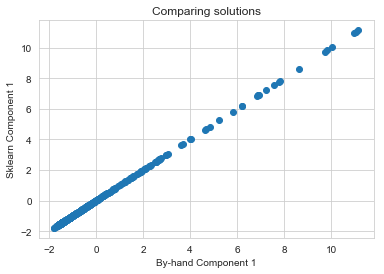

In [32]:
# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [38]:
usedu_exp_nonull_corr = usedu_exp_nonull.corr()
usedu_exp_nonull_corr

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,weighted avg,PCA 1
TOTAL_EXPENDITURE,1.000000,0.990349,0.993537,0.944934,0.929147,0.074942,0.995594
INSTRUCTION_EXPENDITURE,0.990349,1.000000,0.975890,0.904716,0.888574,0.088937,0.975830
SUPPORT_SERVICES_EXPENDITURE,0.993537,0.975890,1.000000,0.951907,0.915249,0.078978,0.991324
OTHER_EXPENDITURE,0.944934,0.904716,0.951907,1.000000,0.920765,0.004678,0.966480
CAPITAL_OUTLAY_EXPENDITURE,0.929147,0.888574,0.915249,0.920765,1.000000,-0.004481,0.951902
weighted avg,0.074942,0.088937,0.078978,0.004678,-0.004481,1.000000,0.063639
PCA 1,0.995594,0.975830,0.991324,0.966480,0.951902,0.063639,1.000000


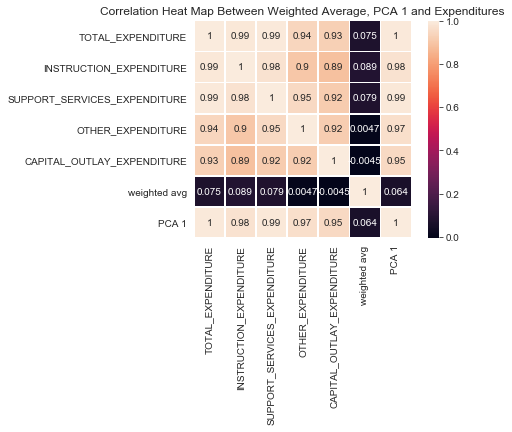

In [39]:
sns.heatmap(usedu_exp_nonull_corr, square=True, annot=True, linewidths=0.5)
plt.title('Correlation Heat Map Between Weighted Average, PCA 1 and Expenditures')
plt.show()

It has a positive relationship with first principal component.

### 5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

Instruction expenditure variable is more correlated with the overall score than the first principal component. Hence using instruction expenditure makes more sense. PCA works best when the correlation between the variables are less than and equal to 0.8. In our case, all of the expenditure variables are highly correlated with each other. This may result in instable principal component estimations.

Let's refer to this.  
"PCA works best for normally distributed data and assumes the relationships among variables are linear. PCA also works best when the variables involved range from weak to moderately strong correlations. Correlations of 0, or correlations greater than .7 or .8, create problems. Correlations near 0 mean there is no shared information. Correlations that are too high can result in components that are unstable and, therefore, change a lot in response to very small changes in the data or components made up of variance from only 1 or 2 variables. A few very high or very low correlations are fine. It is when we have a variable with mostly very high or very low correlations with other variables that problems can occur."